분류(classification), 검출(detection), 분할(segmentation)

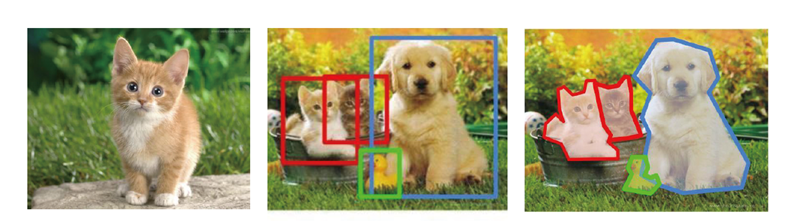

비전 주요 모델 및 알고리즘
  - R-CNN
  - Fast R-CNN
  - Faster R-CNN
  - YOLO(you only look once)

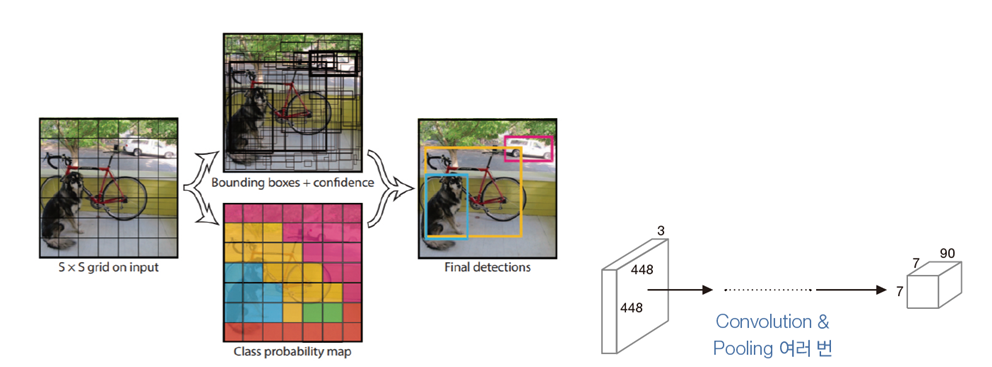

In [1]:
# 입력을 S x S 격자의 각 방에 대해서 B개의 바운딩박스를생성( 바운딩박스는 (x,y,w,h,o)  )
# C = 80개의 물체 분류
# YOLOv3
# yolo_82, yolo_94 중간층 , yolo_106 마지막 층에서 추출가능

In [2]:
# 데이터 공유 : https://drive.google.com/drive/folders/1ypkUz7ZND3M3gbMUJtjF-HC4zVmP0-_N?usp=sharing

In [13]:
import numpy as np
import cv2
classes = []
# 욜로는 ms coco 데이셋에 대해 학습  80개의 부류 이름을 읽어 옴
with open('/content/drive/MyDrive/yolo5_data/coco.names.txt','r') as f:
  classes =  [line.strip() for line in f.readlines()]
  colors = np.random.uniform(0,255,size=(len(classes),3))
  # print(colors.shape)
  # 탐지할 테스트 이미지
  img = cv2.imread('/content/drive/MyDrive/yolo5_data/yolo_test.jpg')
  height,width,channels = img.shape
  # 입력형식을 yolo형태로 변경 (배치,채널,가로,세로) -> (1, 3, 448, 448)
  blob = cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)
  # 모델 불러오기
  yolo_model = cv2.dnn.readNet('/content/drive/MyDrive/yolo5_data/yolov3.weights',
                  '/content/drive/MyDrive/yolo5_data/yolov3.cfg')
  layer_names = yolo_model.getLayerNames()
  # [200 227 254]
  out_layers =  [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers() ]

  # 테스트 영상을 신경망에 입력
  yolo_model.setInput(blob)
  # 출력
  output3 = yolo_model.forward(out_layers)
  class_ids, confidences, boxes = [],[],[]
  for output in output3:  # 3 개
    for vec in output:
      scores =  vec[5:]  # 확률 점수만 획득
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5  # 확률이 0.5를 넘는 바운딩 박스를 모음
        # 취합한 박스들의 정보중에 중심좌표를 획득
        centerx, centery = int(vec[0]*width),int(vec[1]*height)
        w,h = int(vec[2]*width),int(vec[3]*height)
        x,y = int(centerx-w/2), int(centery-h/2)
        boxes.append([x,y,w,h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
  # 박스주위에 잔상이나 그런형태의 박스를 배제하기위해서 가장 적합한 확률의 박스만 남긴다
  indexes = cv2.dnn.NMSBoxes(boxes,confidence,0.5,0.4)





[[0.0341786  0.03958032 0.36381173 ... 0.         0.         0.        ]
 [0.04493126 0.0345393  0.25344387 ... 0.         0.         0.        ]
 [0.04175491 0.03381934 0.7062315  ... 0.         0.         0.        ]
 ...
 [0.95829934 0.9535302  0.37716657 ... 0.         0.         0.        ]
 [0.9657087  0.9646196  0.26933432 ... 0.         0.         0.        ]
 [0.96771526 0.9660801  0.72957516 ... 0.         0.         0.        ]]
